<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

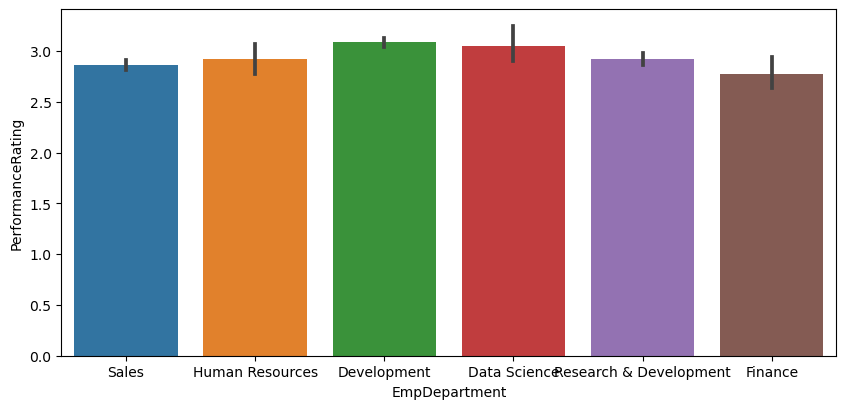

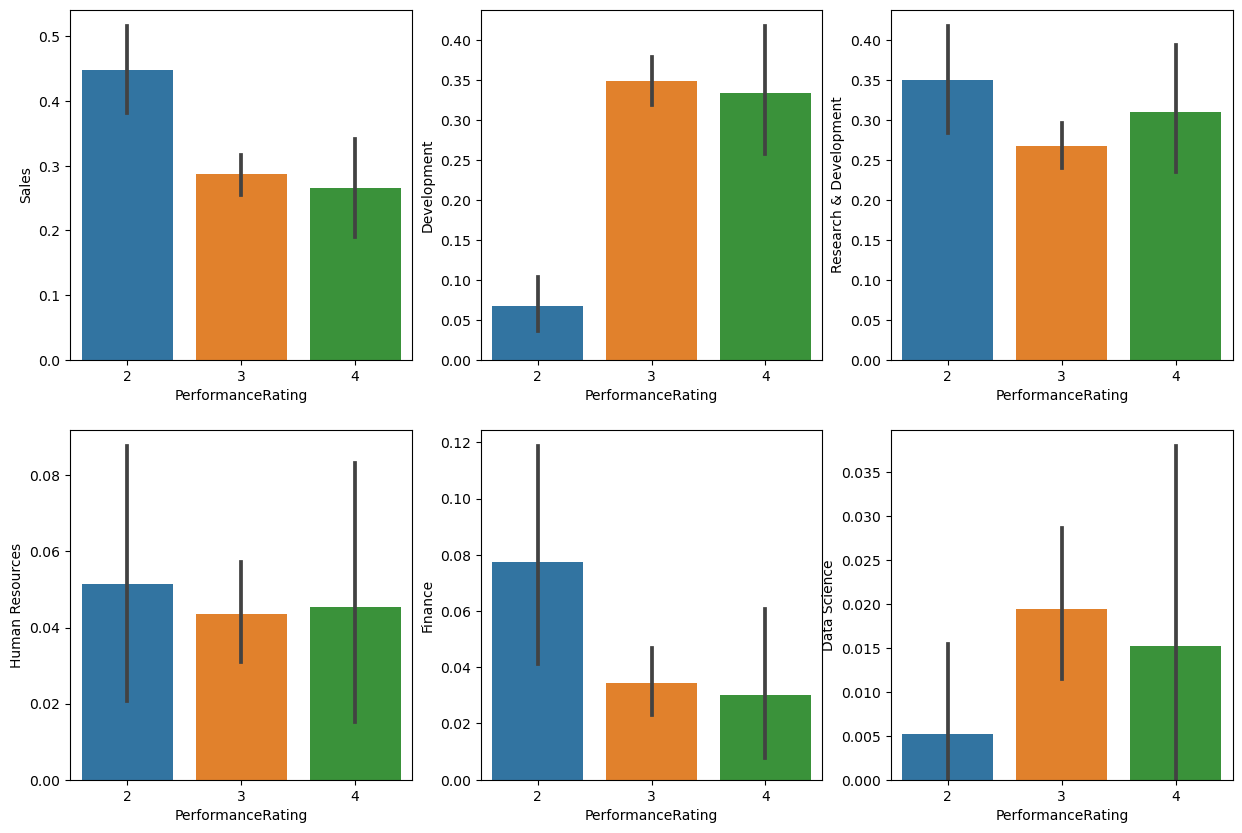

0.9333333333333333
              precision    recall  f1-score   support

           2       0.90      0.89      0.90        63
           3       0.95      0.97      0.96       264
           4       0.83      0.76      0.79        33

    accuracy                           0.93       360
   macro avg       0.90      0.87      0.88       360
weighted avg       0.93      0.93      0.93       360



array([[ 56,   7,   0],
       [  4, 255,   5],
       [  2,   6,  25]])

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

data = pd.read_csv('Hr.csv')

data.shape

data.columns

data.head()

data.info()

dept = data.iloc[:,[5,27]].copy()
dept_per = dept.copy()

dept_per.groupby(by='EmpDepartment')['PerformanceRating'].mean()

plt.figure(figsize=(10,4.5))
sns.barplot(x=dept_per['EmpDepartment'],y=dept_per['PerformanceRating'])

# Analyze each department separately
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

# Creating a new dataframe to analyze each department separately
department = pd.get_dummies(dept_per['EmpDepartment'])
performance = pd.DataFrame(dept_per['PerformanceRating'])
dept_rating = pd.concat([department,performance],axis=1)

# Plotting a separate bar graph for performance of each department using seaborn
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(x=dept_rating['PerformanceRating'],y=dept_rating['Sales'])
plt.subplot(2,3,2)
sns.barplot(x=dept_rating['PerformanceRating'],y=dept_rating['Development'])
plt.subplot(2,3,3)
sns.barplot(x=dept_rating['PerformanceRating'],y=dept_rating['Research & Development'])
plt.subplot(2,3,4)
sns.barplot(x=dept_rating['PerformanceRating'],y=dept_rating['Human Resources'])
plt.subplot(2,3,5)
sns.barplot(x=dept_rating['PerformanceRating'],y=dept_rating['Finance'])
plt.subplot(2,3,6)
sns.barplot(x=dept_rating['PerformanceRating'],y=dept_rating['Data Science'])
plt.show()

enc = LabelEncoder()
for i in (2,3,4,5,6,7,16,26):
    data.iloc[:,i] = enc.fit_transform(data.iloc[:,i])
data.head()

data.corr()

# Dropping the first columns as it is of no use for analysis.
data.drop(['EmpNumber'],inplace=True,axis=1)

# Here we have selected only the important columns
y = data.PerformanceRating
X = data.iloc[:,[4,5,9,16,20,21,22,23,24]]
X.head()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

# Standardization technique is used
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train.shape

X_test.shape

# Training the model
from sklearn.ensemble import RandomForestClassifier
classifier_rfg=RandomForestClassifier(random_state=33,n_estimators=23)
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf': [1, 2, 3],
'min_samples_split': [2, 3, 4, 5]}]
model_gridrf=GridSearchCV(estimator=classifier_rfg, param_grid=parameters, scoring='accuracy')
model_gridrf.fit(X_train,y_train)

model_gridrf.best_params_

# Predicting the model
y_predict_rf = model_gridrf.predict(X_test)

# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

confusion_matrix(y_test,y_predict_rf)


